# Основы визуализации данных с помощью matplotlib

### Урок 5. Визуализация категориальных данных

В этом уроке мы узнаем несколько новых видов графиков для визуализации категориальных данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


([<matplotlib.axis.XTick at 0x7fd790c9e310>,
 <a list of 11 Text major ticklabel objects>)

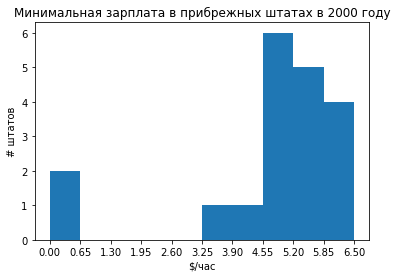

In [ ]:
serie = df[(df['Year'] == 2000) & (df['IsCoastal'] == 1)]['Salary']

plt.hist(serie)
plt.title("Минимальная зарплата в прибрежных штатах в 2000 году")
plt.xlabel('$/час')
plt.ylabel('# штатов')

bin_width = serie.max() / 10
x_range = [i*bin_width for i in range(11)]

plt.xticks(x_range)

#### **Столбчатая диаграмма**

Для визуализации категориальных данных часто используют такой тип графика, как столбчатая диаграмма, или **barchart**.

Для построения такой диаграммы в `matplotlib` есть функция `plt.bar`, в которую, так же, как и в функцию `plt.scatter`, нужно передать 2 массива данных:
* Во-первых, массив категорий, которые будут отображаться по оси Х
* И во-вторых, значение для каждой категории, которые будут отображать высоту каждого столбика.


Построим график сравнивнения средних значений минимальных зарплат в прибрежных и неприбрежных штатах в 2015 году. Подготовим данные. Нам нужно сначала выбрать данные только за 2015 год, потом сгруппировать их по признаку **IsCoastal**, затем посчитать среднюю зарплату для каждой группы. 

In [ ]:
df_1 = df[(df['Year']==2015)].groupby('IsCoastal')['Salary'].mean()
df_1

IsCoastal
0    6.882778
1    7.760526
Name: Salary, dtype: float64

Готово, мы получили серию, с которой можно работать, но давайте еще немного обработаем данные. Во-первых, отсортируем серию по убыванию, чтобы самый высокий столбец был первым, и затем выполним метод `reset_index`, чтобы получить датафрейм из серии.

In [ ]:
df1 = df[(df['Year'] == 2015)].groupby('IsCoastal')['Salary'].mean().sort_values(ascending=False).reset_index()
df1

,IsCoastal,Salary
0,1,7.760526
1,0,6.882778


Еще для красоты давайте заменим 0 и 1 в категории на более говорящие наименования, например **“Not Coastal”** и **“Coastal”**. Для этого создадим новый признак с помощью функции np.where, в которую сначала передадим условие, затем 2 варианта, которые это функция должна вернуть для строк, в которых условие выполняется, и в которых не выполняется.

In [ ]:
df1['IsCoastalStr'] = np.where(df1['IsCoastal'] == 1, 'Coastal', 'Not Coastal')
df1

,IsCoastal,Salary,IsCoastalStr
0,1,7.760526,Coastal
1,0,6.882778,Not Coastal


Теперь все готово, можем построить барчарт. Для этого вызовем функцию `plt.bar`, в качестве первого параметра передадим категории, т.е. признак **IsCoastalStr**, в качестве второго параметра – высоты столбцов, т.е. признак Salary. Добавим заголовок и подписи осей. 

Text(0.5, 0, 'Тип штата')

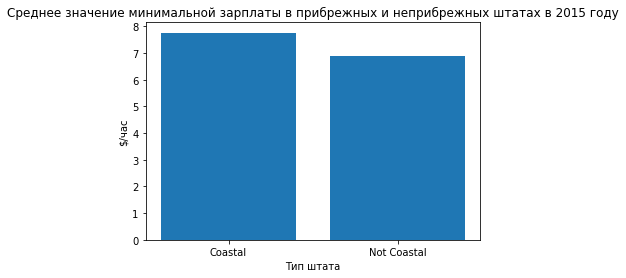

In [ ]:
plt.bar(df1['IsCoastalStr'], df1['Salary'])
plt.title("Среднее значение минимальной зарплаты в прибрежных и неприбрежных штатах в 2015 году")
plt.ylabel('$/час')
plt.xlabel('Тип штата')

Еще одно важное отличие гистограммы от барчарта в том, что в гистограмме в качестве независимой переменной (т.е. по оси Х) всегда выступает численная переменная, целочисленная или с плавающей точкой, тогда как в столбчатой диаграмме это категориальный признак. Давайте попробуем построить столбчатую диаграмму, в которой по оси Х будут непрерывные данные, и увидим, почему это не самая лучшая мысль.

Например, выберем данные за 2017 год, сгруппируем по зарплате и посчитаем, в скольки штатах та или иная зарплата встречается в 2017 году. Преобразуем серию в датафрейм и отсортируем по возрастанию зарплаты, чтобы график был похож на гистограмму. Теперь построим барчарт. По оси Х будет идти зарплата, по оси Y – количество штатов.


Text(0, 0.5, '# штатов')

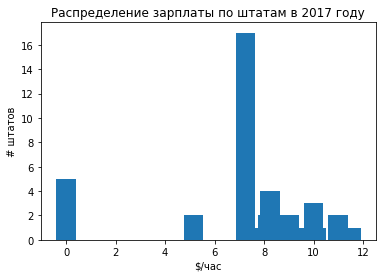

In [ ]:
df2 = df[df['Year'] == 2017].groupby('Salary')['State'].count().reset_index().sort_values('Salary')
plt.bar(df2['Salary'], df2['State'])
plt.title("Распределение зарплаты по штатам в 2017 году")
plt.xlabel('$/час')
plt.ylabel('# штатов')

На первый взгляд кажется, что получили почти гистограмму, но если присмотримся, то увидим, что и ширина столбцов различается, и их число заметно увеличилось, и это при том, что у нас не так много данных. Сравним с соответствующей гистограммой за этот же период:


([<matplotlib.axis.XTick at 0x7fd7899e4b10>,
 <a list of 11 Text major ticklabel objects>)

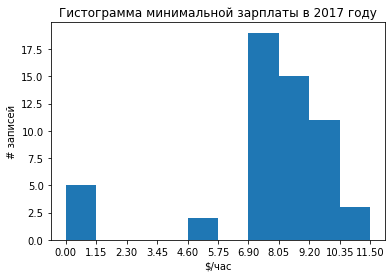

In [ ]:
series = df[df['Year'] == 2017]['Salary']

plt.hist(series, bins=10)
plt.title("Гистограмма минимальной зарплаты в 2017 году")
plt.xlabel('$/час')
plt.ylabel('# записей')

bin_width = series.max() / 10
x_range = [i*bin_width for i in range(11)]
plt.xticks(x_range)

#### Круговая диаграмма

Теперь давайте посмотрим на еще один тип графика, который используется для визуализации категориальных данных. Это круговая диаграмма, или **pie chart**, которая показывает, какую часть от 100% занимает та или иная категория.

Построим график процентного соотношения числа прибрежных и неприбрежных штатов.

Для этого в `matplotlib` есть функция `plt.pie`, которая принимает 2 массива данных - массив категорий и соответственный размер категорий. Давайте сначала подготовим данные.

Для этого сначала добавим в основной датафрейм новый признак **IsCoastalStr**, который мы уже добавляли ранее, но в небольшой датафрейм. Этот признак нужен, чтобы в дальнейшем подписи на графике были в читаемом виде, а не просто 0 и 1.

Теперь выберем из датасета только признаки **State** и **IsCoastalStr**, уберем дублирующиеся записи, сгруппируем по **IsCoastalStr** и посчитаем количество штатов в каждой группе.


In [ ]:
df['IsCoastalStr'] = np.where(df['IsCoastal'] == 1, 'Coastal', 'Not Coastal')

serie3 = df[['State', 'IsCoastalStr']].drop_duplicates().groupby('IsCoastalStr')['State'].count()
serie3

IsCoastalStr
Coastal        19
Not Coastal    36
Name: State, dtype: int64

Теперь вызовем функцию `plt.pie()`, в которую передадим серию. Также в этой функции укажем параметр **labels**, в который передадим значения категорий, которыми нужно будет подписывать участки диаграммы. Это такой аналог оси Х в предыдущих типах графиков. Эти значения содержатся в индексах. И еще один параметр, **autopct**, он нужен, если мы хотим подписать доли графика процентами. Этот параметр принимает строку особого вида, называемую строкой форматирования.

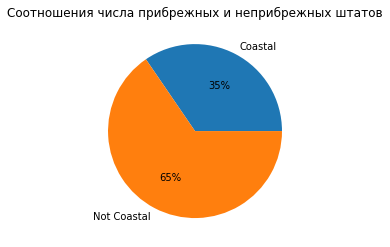

In [ ]:
plt.pie(serie3, labels = serie3.index, autopct = '%1.0f%%')
plt.title('Соотношения числа прибрежных и неприбрежных штатов');

Мы можем вывести подписи долей с точностью, например, до 2 знаков после точки. Для этого нужно в параметре autopct заменить 0 после точки на 2 и перезапустить ячейку.

Text(0.5, 1.0, 'Соотношение количества прибрежных и неприбрежных штатов')

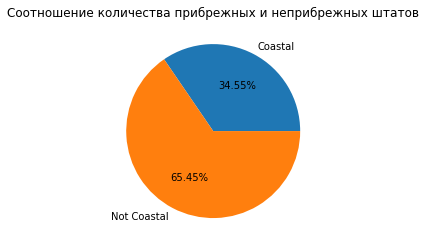

In [ ]:
plt.pie(serie3, labels=serie3.index, autopct='%1.2f%%')
plt.title("Соотношение количества прибрежных и неприбрежных штатов")